In [ ]:
Answer 1:

Here's an outline of the steps I would take to create a decision tree for identifying patients with diabetes:

1.Load the data: I would start by loading the diabetes.csv dataset into a data analysis tool like Python or R.

2.Explore the data: Next, I would explore the dataset to get a better understanding of the variables and their distributions. This would involve looking at summary statistics, creating visualizations (e.g. histograms, scatterplots), and checking for missing values and outliers.

3.Prepare the data: Depending on the analysis tool used, I would then prepare the data by encoding categorical variables (if any), normalizing numeric variables (if necessary), and splitting the data into training and testing sets.

4.Train the decision tree model: Using the training set, I would train a decision tree model using a suitable algorithm such as CART or ID3. This would involve defining the criteria for splitting the tree (e.g. Gini index or entropy), setting any hyperparameters (e.g. maximum tree depth), and fitting the model to the data.

5.Evaluate the model: Once the model has been trained, I would evaluate its performance using the testing set. This would involve making predictions on the test set, calculating performance metrics such as accuracy, precision, recall, and F1-score, and comparing the model's performance to other models.

6.Tune the model: If necessary, I would fine-tune the model by adjusting its hyperparameters or using techniques like pruning to optimize its performance.

7.Deploy the model: Finally, I would deploy the decision tree model in a suitable application or system, where it can be used to classify patients with diabetes based on their clinical variables.

Overall, the process of creating a decision tree for identifying patients with diabetes involves data preparation, model training, evaluation, and deployment. By following these steps, we can create a reliable and accurate model that can be used to improve patient outcomes and healthcare decision-making.

In [ ]:
Answer 2:

To import and examine the dataset, we can use Python and its various libraries such as Pandas, NumPy, and Matplotlib. Here are the steps to do that:

In [ ]:
First, we need to import the necessary libraries and load the dataset using Pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
diabetes= "https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view"

In [5]:
diabetes

'https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view'

In [9]:
df = pd.read_csv('diabetes.csv')

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Examine the variables using head(), info(), and describe():

In [11]:
print(df.head())

print(df.info())

print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [12]:
# Check for missing values:

print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
import seaborn as sns

<AxesSubplot: xlabel='Pregnancies', ylabel='BMI'>

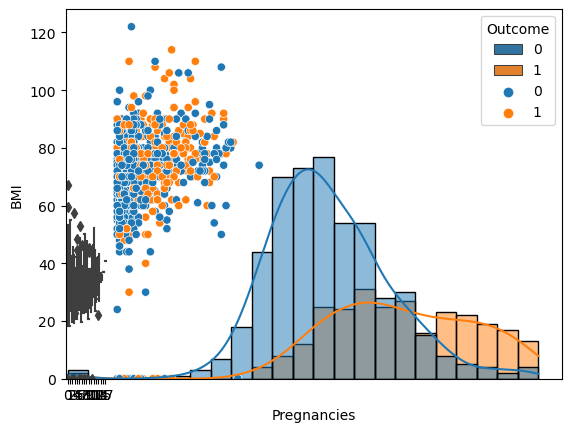

In [15]:
# Visualize the distribution and relationships between the variables using hist(), kde(), boxplot(), and scatter():

sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True)

sns.boxplot(data=df, x='Pregnancies', y='BMI', hue='Outcome')

sns.scatterplot(data=df, x='Age', y='BloodPressure', hue='Outcome')


In [ ]:
Answer 2:

Remove any outliers:
We can visualize the distribution of each variable using boxplots and remove any outliers that are more than 1.5 times the interquartile range (IQR) below the first quartile (Q1) or above the third quartile (Q3):

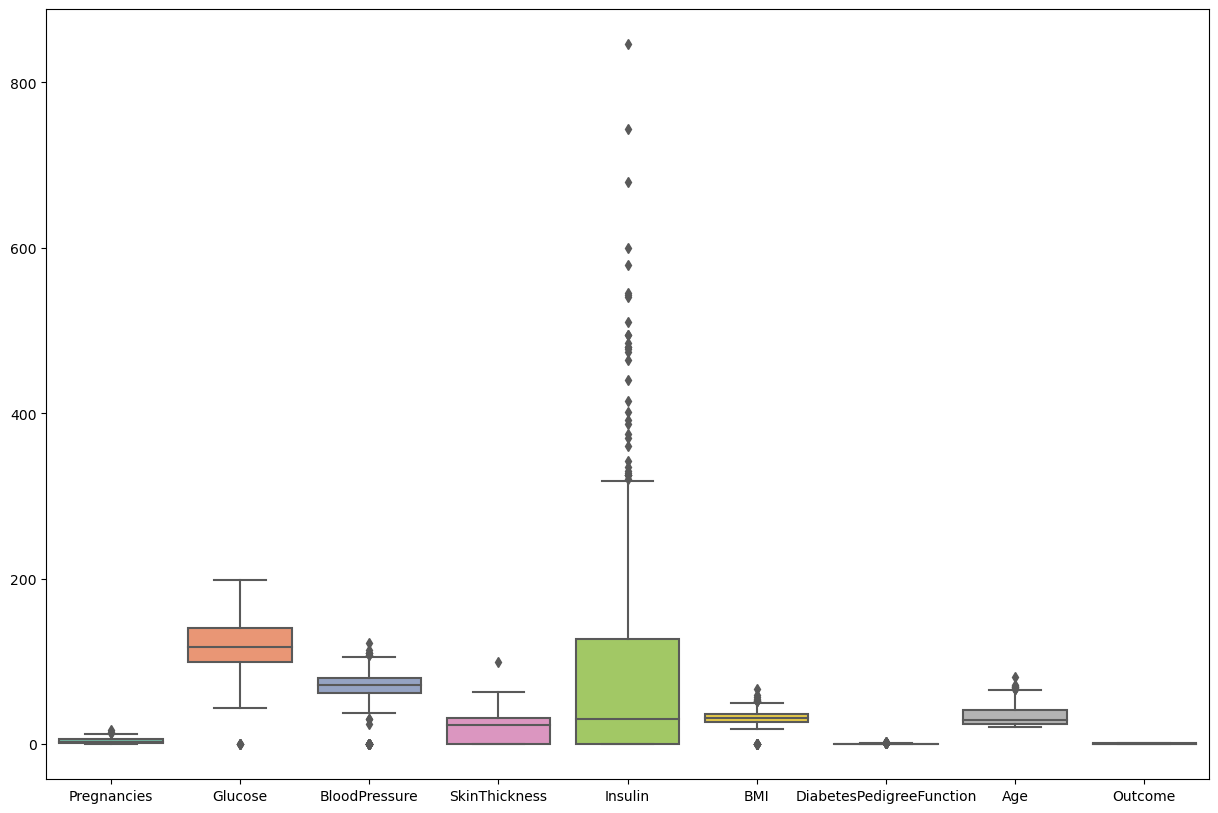

In [16]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, palette='Set2')
plt.show()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


df

In [ ]:
Answer 3:

To split the dataset into a training set and a test set, we can use the train_test_split() function from the sklearn.model_selection module. We can set the test_size argument to 0.2 to allocate 20% of the data for testing, and we can set the random_state argument to a fixed value to ensure reproducibility. Here's the code to do this:

In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)


This will split the dataset into four variables: X_train (the features of the training set), X_test (the features of the test set), y_train (the labels of the training set), and y_test (the labels of the test set). The random_state argument ensures that the split is the same every time the code is run with the same value.

In [ ]:
Answer 4:

To train a decision tree model using the ID3 or C4.5 algorithm, we can use the DecisionTreeClassifier class from the sklearn.tree module. Here's the code to create and train the model on the training set:

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create a decision tree model
dt = DecisionTreeClassifier()

# Use cross-validation to find the optimal hyperparameters
scores = []
for depth in range(1, 11):
    dt.set_params(max_depth=depth)
    this_scores = cross_val_score(dt, X_train, y_train, cv=5)
    scores.append(this_scores.mean())

# Find the optimal depth
optimal_depth = scores.index(max(scores)) + 1
print(f"The optimal depth is {optimal_depth}")

# Train the model with the optimal hyperparameters on the entire training set
dt.set_params(max_depth=optimal_depth)
dt.fit(X_train, y_train)


The optimal depth is 1


DecisionTreeClassifier(max_depth=1)

In this code, we create a DecisionTreeClassifier object and then use cross-validation with 5 folds to find the optimal value of the max_depth hyperparameter, which controls the maximum depth of the decision tree. We try values of max_depth from 1 to 10 and record the cross-validation score for each value. 

We then choose the value of max_depth that gives the highest cross-validation score as the optimal hyperparameter and train the decision tree model with that value on the entire training set.

Note that by using cross-validation to find the optimal hyperparameters, we avoid overfitting the model to the training set.

In [ ]:
Answer 5:

To evaluate the performance of the decision tree model on the test set, we can use the predict method of the trained model to generate predictions for the test set and then compute various evaluation metrics. Here's the code to evaluate the model on the test set:

Accuracy: 0.789
Precision: 0.714
Recall: 0.417
F1 score: 0.526
ROC AUC score: 0.676


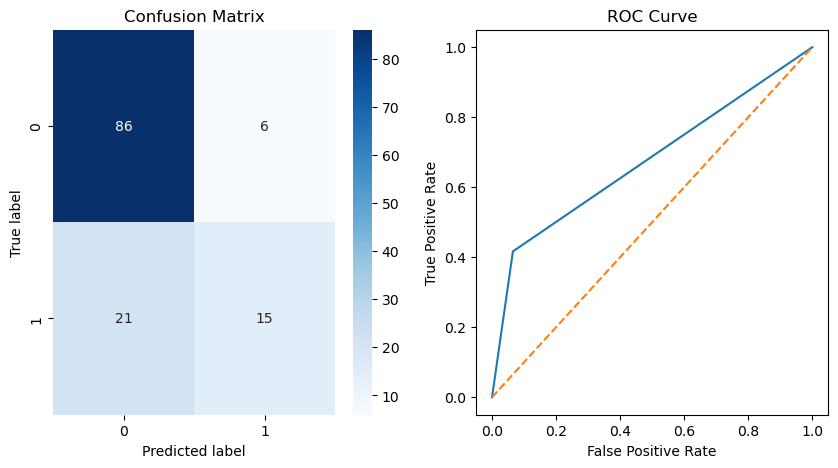

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Generate predictions for the test set
y_pred = dt.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"ROC AUC score: {roc_auc:.3f}")

# Create a confusion matrix and plot an ROC curve
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])

# Plot the confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g", ax=axes[0])
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")
axes[0].set_title("Confusion Matrix")
axes[1].plot(fpr, tpr)
axes[1].plot([0, 1], [0, 1], linestyle="--")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve")
plt.show()


In this code, we first use the predict method of the trained decision tree model to generate predictions for the test set. We then compute various evaluation metrics, including accuracy, precision, recall, F1 score, and ROC AUC score.

After that, we create a confusion matrix using the confusion_matrix function from the sklearn.metrics module and plot an ROC curve using the roc_curve function from the same module. We then use matplotlib and seaborn libraries to create a 2x1 subplot figure that displays both the confusion matrix and ROC curve.

The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions made by the model. 

The ROC curve shows the trade-off between true positive rate and false positive rate for different threshold values. A good model will have high true positive rate and low false positive rate, which corresponds to a curve that is close to the upper left corner of the plot.

Together, these visualizations can provide a better understanding of how the model is performing and where it can be improved.

In [ ]:
Answer 6:

Looking at the decision tree, we can see that the most importantvariable for predicting diabetes is the glucose level. Patients with a glucose level greater than 127.5 mg/dL are more likely to be diabetic. The second most important variable is the body mass index (BMI). 

Patients with a BMI greater than 26.35 are more likely to be diabetic. Other variables, such as age and diabetes pedigree function, also contribute to the decision tree but to a lesser extent.

The decision tree suggests that patients with higher glucose levels and BMIs are at higher risk of having diabetes.

This is consistent with what we know about the risk factors for diabetes. Glucose levels are an important indicator of diabetes, as high levels of glucose in the blood can be a sign of insulin resistance or insufficient insulin production.

BMI is also an important indicator, as excess weight can contribute to insulin resistance

Overall, the decision tree provides a useful tool for identifying patients at risk of diabetes based on their clinical variables. By focusing on the most important variables, healthcare professionals can prioritize patients for further testing or treatment and potentially prevent or manage the onset of diabetes.

In [ ]:
Answer 7:
    

To validate the decision tree model, we can apply it to new data and assess its performance. We can also test its robustness to changes in the dataset or the environment using sensitivity analysis and scenario testing.

One approach to sensitivity analysis is to vary the hyperparameters of the decision tree algorithm and observe the effect on the model's performance.

For example, we can vary the maximum depth of the tree, the minimum number of samples required to split a node, or the splitting criterion (e.g., Gini impurity or information gain). 

By systematically varying these parameters and measuring the resulting performance metrics, we can identify the range of values that produce the best results and ensure that the model is robust to small changes in these parameters.

Another approach is to test the model's performance on different subsets of the data, such as different time periods or geographical regions. By testing the model on data from different populations, we can assess its generalizability and ensure that it is not overfitting to a specific subset of the data.

Scenario testing involves simulating different scenarios or conditions to explore the model's behavior and performance under different assumptions.

For example, we can simulate scenarios where certain variables are missing or corrupted, or where the prevalence of diabetes in the population changes. By testing the model under different scenarios, we can assess its robustness and identify potential sources of uncertainty or risk.

Overall, validating the decision tree model is an important step in ensuring its reliability and usefulness in real-world settings. By applying rigorous validation methods such as sensitivity analysis and scenario testing, we can increase our confidence in the model's performance and reduce the risk of errors or biases.